In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [3]:
def parse_accs(fname):
    fin_acc = 0
    with open(fname, 'r') as f:
        for line in f.readlines():
            if 'end model (LeNet) test acc: ' in line:
                fin_acc = float(line.split()[-1])
    return fin_acc

In [5]:
resdir = 'results/kmnist/snubasweep'
lf_class_options = ''

accs = []
fnames = []

for embedding in ['raw', 'pca', 'resnet18', 'vae']:
    for em_hard_labels in ['True', 'False']:
        for snuba_cardinality in [1, 2]:
            for n_labeled_points in [100]:
                fname = f'{resdir}/embedding_{embedding}/lf_class_options_{lf_class_options}/em_hard_labels_{em_hard_labels}/snuba_cardinality_{snuba_cardinality}/n_labeled_points_{n_labeled_points}/res.log'
                acc = parse_accs(fname)
                fnames.append(fname)
                accs.append(acc)

                if snuba_cardinality == 2:
                    print(embedding, em_hard_labels, acc)

fnames = np.array(fnames)
accs = np.array(accs)

raw True 0
raw False 0
pca True 0.1518
pca False 0.1653
resnet18 True 0
resnet18 False 0
vae True 0
vae False 0.2612


In [7]:
fnames[np.argsort(accs)[::-1][:20]]

array(['results/fashion_mnist/snubasweep/embedding_raw/lf_class_options_/em_hard_labels_True/snuba_cardinality_1/n_labeled_points_500/res.log',
       'results/fashion_mnist/snubasweep/embedding_raw/lf_class_options_/em_hard_labels_True/snuba_cardinality_1/n_labeled_points_1000/res.log',
       'results/fashion_mnist/snubasweep/embedding_raw/lf_class_options_/em_hard_labels_False/snuba_cardinality_1/n_labeled_points_1000/res.log',
       'results/fashion_mnist/snubasweep/embedding_raw/lf_class_options_/em_hard_labels_False/snuba_cardinality_1/n_labeled_points_100/res.log',
       'results/fashion_mnist/snubasweep/embedding_raw/lf_class_options_/em_hard_labels_True/snuba_cardinality_1/n_labeled_points_100/res.log',
       'results/fashion_mnist/snubasweep/embedding_raw/lf_class_options_/em_hard_labels_False/snuba_cardinality_1/n_labeled_points_500/res.log',
       'results/fashion_mnist/snubasweep/embedding_raw/lf_class_options_/em_hard_labels_False/snuba_cardinality_2/n_labeled_points_

In [8]:
accs[np.argsort(accs)[::-1][:25]]

array([0.4782, 0.344 , 0.339 , 0.2793, 0.2769, 0.1   , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    ])

In [9]:
fmeta = [{kv.rsplit('_', 1)[0]: kv.rsplit('_', 1)[1] \
    for kv in fname.split('/')[2:-1]} for fname in fnames]

for i in range(len(accs)):
    fmeta[i]['acc'] = accs[i]

df = pd.DataFrame(fmeta)

IndexError: list index out of range

In [10]:
df.sort_values(by=['acc'], ascending=False)[:21]

NameError: name 'df' is not defined

# Random trials of top-5 configurations from above

In [11]:
resdir = 'results/snubasweep'
lf_class_options = 'DecisionTreeClassifier,LogisticRegression'

accs = []
fnames = []

for embedding in ['raw', 'pca', 'resnet18', 'vae']:
    for em_hard_labels in ['True', 'False']:
        for snuba_cardinality in [1, 2]:
            for n_labeled_points in [100, 500, 1000, 5000]:
                fname = f'{resdir}/embedding_{embedding}/lf_class_options_{lf_class_options}/em_hard_labels_{em_hard_labels}/snuba_cardinality_{snuba_cardinality}/n_labeled_points_{n_labeled_points}/res.log'
                acc = parse_accs(fname)
                fnames.append(fname)
                accs.append(acc)

fnames = np.array(fnames)
accs = np.array(accs)


def namegiver(embedding, em_hard_labels, snuba_cardinality, n_labeled_points):
    return f'{embedding}, \nhard labels={em_hard_labels}, \ncardinality={snuba_cardinality}, \nlabels={n_labeled_points}'

accs1 = []
accs2 = []
accs3 = []
accs4 = []
accs5 = []
meta = []
for seed in np.arange(5):
    # Top-1
    embedding = 'vae'
    em_hard_labels = False
    snuba_cardinality = 2
    n_labeled_points = 100
    fname = f'{resdir}/embedding_{embedding}/lf_class_options_{lf_class_options}/em_hard_labels_{em_hard_labels}/snuba_cardinality_{snuba_cardinality}/n_labeled_points_{n_labeled_points}/res_seed{seed}.log'
    acc = parse_accs(fname)
    if acc == 0:
        print(fname)
    accs1.append(acc)
    meta.append(namegiver(
        embedding, em_hard_labels, snuba_cardinality, n_labeled_points))

    # Top-2
    embedding = 'vae'
    em_hard_labels = False
    snuba_cardinality = 2
    n_labeled_points = 500
    fname = f'{resdir}/embedding_{embedding}/lf_class_options_{lf_class_options}/em_hard_labels_{em_hard_labels}/snuba_cardinality_{snuba_cardinality}/n_labeled_points_{n_labeled_points}/res_seed{seed}.log'
    acc = parse_accs(fname)
    accs2.append(acc)
    meta.append(namegiver(
        embedding, em_hard_labels, snuba_cardinality, n_labeled_points))

    # Top-3
    embedding = 'vae'
    em_hard_labels = True
    snuba_cardinality = 2
    n_labeled_points = 100
    fname = f'{resdir}/embedding_{embedding}/lf_class_options_{lf_class_options}/em_hard_labels_{em_hard_labels}/snuba_cardinality_{snuba_cardinality}/n_labeled_points_{n_labeled_points}/res_seed{seed}.log'
    acc = parse_accs(fname)
    accs3.append(acc)
    meta.append(namegiver(
        embedding, em_hard_labels, snuba_cardinality, n_labeled_points))

    # Top-4
    embedding = 'pca'
    em_hard_labels = True
    snuba_cardinality = 2
    n_labeled_points = 100
    fname = f'{resdir}/embedding_{embedding}/lf_class_options_{lf_class_options}/em_hard_labels_{em_hard_labels}/snuba_cardinality_{snuba_cardinality}/n_labeled_points_{n_labeled_points}/res_seed{seed}.log'
    acc = parse_accs(fname)
    accs4.append(acc)
    meta.append(namegiver(
        embedding, em_hard_labels, snuba_cardinality, n_labeled_points))

    # Top-5
    embedding = 'pca'
    em_hard_labels = True
    snuba_cardinality = 2
    n_labeled_points = 500
    fname = f'{resdir}/embedding_{embedding}/lf_class_options_{lf_class_options}/em_hard_labels_{em_hard_labels}/snuba_cardinality_{snuba_cardinality}/n_labeled_points_{n_labeled_points}/res_seed{seed}.log'
    acc = parse_accs(fname)
    accs5.append(acc)
    meta.append(namegiver(
        embedding, em_hard_labels, snuba_cardinality, n_labeled_points))


FileNotFoundError: [Errno 2] No such file or directory: 'results/snubasweep/embedding_raw/lf_class_options_DecisionTreeClassifier,LogisticRegression/em_hard_labels_True/snuba_cardinality_1/n_labeled_points_100/res.log'

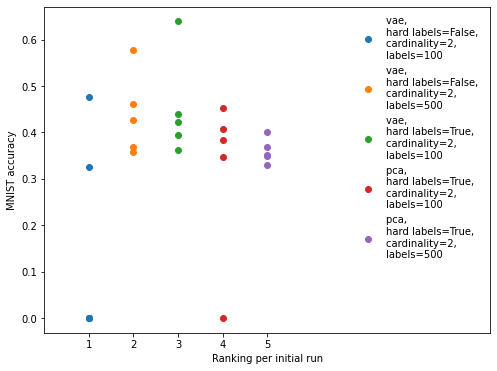

In [10]:
accs = [accs1, accs2, accs3, accs4, accs5]

plt.figure(figsize=(8, 6))
plt.xlim(0, 10)
plt.xticks(np.arange(5) + 1)
for i in range(5):
    plt.scatter(np.ones(len(accs[i])) * (i+1), accs[i], label=f'{meta[i]}')

plt.xlabel('Ranking per initial run')
plt.ylabel('MNIST accuracy')
plt.legend(frameon=False)

In [11]:
accs3

[0.4222, 0.639, 0.3943, 0.4402, 0.361]

In [14]:
accs = []
fnames = []

# Fixed HPs
snuba_combo_samples=10_000
embedding = 'vae'
em_hard_labels = True
snuba_cardinality = 2
n_labeled_points = 100

for seed in [0, 1, 2, 3, 4]:
    for snuba_cardinality in [2]:
        savedir = f'{resdir}/embedding_{embedding}/lf_class_options_{lf_class_options}/em_hard_labels_{em_hard_labels}/snuba_cardinality_{snuba_cardinality}/n_labeled_points_{n_labeled_points}'
        fname = f'{savedir}/res_seed{seed}_samples10_000.log'

        acc = parse_accs(fname)
        fnames.append(fname)
        accs.append(acc)

fnames = np.array(fnames)
accs = np.array(accs)

In [15]:
accs

array([0.418 , 0.3904, 0.    , 0.4392, 0.4448])